In [20]:
import pandas as pd 
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [12]:
## Carga del dataset
path = '../examen_data_science_fundamentals/data/ds_salaries.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.head(20)

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [13]:
##Limpieza de datos 
#Deteccion de valores duplicados
print(df.duplicated().sum())
duplicados = df.duplicated()
#print(duplicados)
###Se detectaron 1171 elementos duplicados. Asumiendo que el analisis se basa en los salarios como agrupacion no como una planilla de funcionarios podemos proceder a eliminar los duplicados
df.drop_duplicates(inplace = True) ## eliminacion de filas duplicadas en filas con afectacion directa al dataframe


1171


In [14]:
##Verificacion post eliminacion de duplicados
print("Cantidad de filas duplicadas luego de la eliminacion: ",df.duplicated().sum())
##Verificacion y ajustes de tipos de datos
df.info()
#Usando Dic para modificar el tipo de datos. Sacado de sitio web https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
convert_dict = {'experience_level': str,
                'employment_type': str,
                'job_title':str,
                'salary_currency':str,
                'employee_residence':str,
                'company_location': str,
                'company_size':str
                }
df = df.astype(convert_dict)
## Siguen siendo object ya que pandas considera str como objeto, pero esto ya fue aplicado para asegurar el tipo
print("Dtype Modificado")
df.dtypes

Cantidad de filas duplicadas luego de la eliminacion:  0
<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB
Dtype Modificado


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [15]:
##Consistencia en valores categoricos
# Verifica los valores únicos antes de la corrección
print(sorted(df['experience_level'].unique()))
print(sorted(df['employment_type'].unique()))
print(sorted(df['job_title'].unique()))
print(sorted(df['salary_currency'].unique()))
print(sorted(df['employee_residence'].unique()))
print(sorted(df['company_location'].unique()))
print(sorted(df['company_size'].unique()))
## En una primera observacion no se obeserva inconsitencia, sin embargo se procede a realizar las modificaciones en caso de ser necesario
##Se cambiar str to upper y strip. Revisado en link:https://stackoverflow.com/questions/39512002/convert-whole-dataframe-from-lower-case-to-upper-case-with-pandas  
df.apply(lambda x: x.astype(str).str.upper().str.strip())


['EN', 'EX', 'MI', 'SE']
['CT', 'FL', 'FT', 'PT']
['3D Computer Vision Researcher', 'AI Developer', 'AI Programmer', 'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist', 'Applied Machine Learning Engineer', 'Applied Machine Learning Scientist', 'Applied Scientist', 'Autonomous Vehicle Technician', 'Azure Data Engineer', 'BI Analyst', 'BI Data Analyst', 'BI Data Engineer', 'BI Developer', 'Big Data Architect', 'Big Data Engineer', 'Business Data Analyst', 'Business Intelligence Engineer', 'Cloud Data Architect', 'Cloud Data Engineer', 'Cloud Database Engineer', 'Compliance Data Analyst', 'Computer Vision Engineer', 'Computer Vision Software Engineer', 'Data Analyst', 'Data Analytics Consultant', 'Data Analytics Engineer', 'Data Analytics Lead', 'Data Analytics Manager', 'Data Analytics Specialist', 'Data Architect', 'Data DevOps Engineer', 'Data Engineer', 'Data Infrastructure Engineer', 'Data Lead', 'Data Management Specialist', 'Data Manager', 'Data Modeler', 'Data Operatio

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,PRINCIPAL DATA SCIENTIST,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML ENGINEER,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML ENGINEER,25500,USD,25500,US,100,US,S
3,2023,SE,FT,DATA SCIENTIST,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,DATA SCIENTIST,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,DATA SCIENTIST,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,PRINCIPAL DATA SCIENTIST,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,DATA SCIENTIST,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,BUSINESS DATA ANALYST,100000,USD,100000,US,100,US,L


In [16]:
###Deteccion de datos anomalos
##Adaptacion de codigo de acuerdo a siguiente link: https://medium.com/@martacasdelg/c%C3%B3mo-identificar-y-tratar-outliers-con-python-bf7dd530fc3 
salario_employment_level = df.groupby('experience_level')['salary_in_usd'].describe()##Vision general del salario in USD de acuerdo a la experiencia

print(salario_employment_level)


### Explicacion: Se utiliza zscore para calcular el umbral de valores atipicos. 
###Según la regla empírica, casi todos los datos (99.7%) se agrupan alrededor de la media en un rango de 3 desviaciones estándar. 
### Los valores fuera de este rango son excepcionales y se clasifican como atípicos.

# Agrupar por 'experience_level' y calcular el Z-score de 'salary_in_usd'
df['salary_zscore'] = df.groupby('experience_level')['salary_in_usd'].transform(lambda x: zscore(x, nan_policy='omit'))## se busca el valor zscore omitiendo nan

# Selecciona los outliers basados en un umbral de 3
threshold = 3
outliers = df[(df['salary_zscore'].abs() > threshold)]

# Contar los valores de outliers según experience_level
count_outliers = outliers.groupby('experience_level').size().reset_index(name='count')

# Mostrar el resultado
print("Cantidad de datos anómalos por nivel de experiencia:")
print(count_outliers)

# Muestra los valores anómalos
print("Valores anómalos:")
print(outliers[['experience_level', 'salary_in_usd', 'salary_zscore']])

# Resetear el índice para evitar ambigüedades ya que genera error de index si no.
df.reset_index(drop=True, inplace=True)


                   count           mean           std      min        25%  \
experience_level                                                            
EN                 270.0   72648.685185  51630.629202   5409.0   31890.00   
EX                  96.0  191078.208333  71003.538826  15000.0  144211.50   
MI                 664.0  101828.783133  56825.125520   5132.0   62486.75   
SE                1554.0  153897.435650  60450.013666   8000.0  112000.00   

                       50%       75%       max  
experience_level                                
EN                 61900.0  100000.0  300000.0  
EX                189618.5  235000.0  416000.0  
MI                 95000.0  134000.0  450000.0  
SE                148800.0  190150.0  423834.0  
Cantidad de datos anómalos por nivel de experiencia:
  experience_level  count
0               EN      2
1               EX      1
2               MI      6
3               SE     15
Valores anómalos:
     experience_level  salary_in_usd  sala

In [17]:
# Explicacion: Imputar valores extremos por experiencia se modifican de acuerdo al valor cercano a su percentil, osea lo que se considere normal.
# Si el salario es bajo se remplaza por el percentil 1%, si el salario es alto se remplaza por el percentil 99% 
def imputar_extremos(grupo):
    #grupo = grupo.reset_index(drop=True)  # Asegurarse de que el índice esté limpio ya que generaba error index
    # Calcular percentiles 1% y 99% para el grupo
    lower_percentile = grupo['salary_in_usd'].quantile(0.01)
    upper_percentile = grupo['salary_in_usd'].quantile(0.99)

    # Imputar valores que están por debajo del percentil 1%
    grupo.loc[grupo['salary_zscore'] < -threshold, 'salary_in_usd'] = lower_percentile
    # Imputar valores que están por encima del percentil 99%
    grupo.loc[grupo['salary_zscore'] > threshold, 'salary_in_usd'] = upper_percentile

    return grupo

# Aplicar la función de imputación a cada grupo
df = df.groupby('experience_level').apply(imputar_extremos)

# Mostrar los datos imputados
print("Datos después de imputar valores extremos:")
print(df[['experience_level', 'salary_in_usd', 'salary_zscore']].head(20))

Datos después de imputar valores extremos:
                     experience_level  salary_in_usd  salary_zscore
experience_level                                                   
EN               13                EN       213660.0       2.736228
                 14                EN       130760.0       1.127610
                 39                EN       100000.0       0.530734
                 40                EN        30000.0      -0.827569
                 42                EN       204620.0       2.560813
                 43                EN       110680.0       0.737972
                 83                EN       221550.0       4.411597
                 95                EN       163196.0       1.757009
                 96                EN       145885.0       1.421101
                 113               EN       220000.0       2.859251
                 114               EN        56536.0      -0.312656
                 135               EN        85000.0       0.239669
     

C:\Users\ENRIF\AppData\Local\Temp\ipykernel_32304\476057181.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6013.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grupo.loc[grupo['salary_zscore'] < -threshold, 'salary_in_usd'] = lower_percentile
C:\Users\ENRIF\AppData\Local\Temp\ipykernel_32304\476057181.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '67003.95' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grupo.loc[grupo['salary_zscore'] < -threshold, 'salary_in_usd'] = lower_percentile
C:\Users\ENRIF\AppData\Local\Temp\ipykernel_32304\476057181.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8812.07' has dtype incompatible with int64, please ex

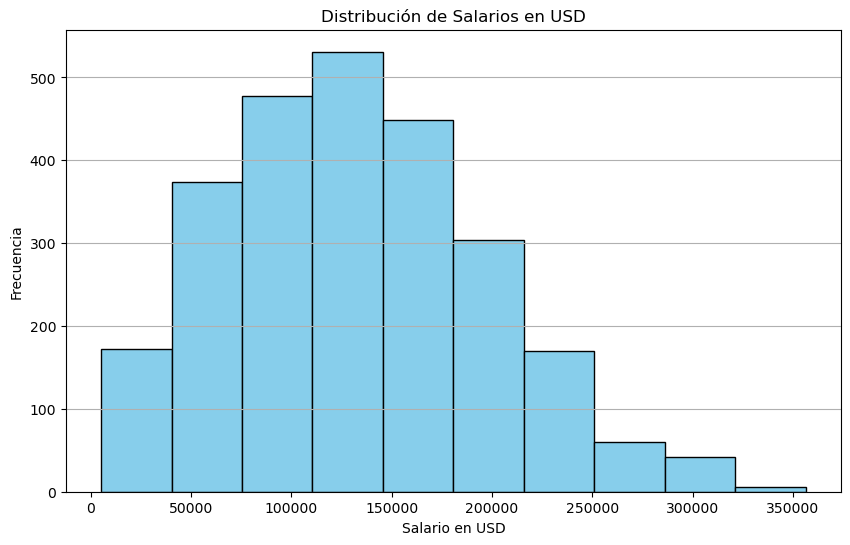

In [31]:
### Grafico univariado 1
plt.figure(figsize=(10, 6)) #tamanho del recuadro de 10x6 pulgadas
plt.hist(df['salary_in_usd'], bins=10, color='skyblue', edgecolor='black')# valor target con las configuraciones de la barra
plt.title('Distribución de Salarios en USD')#titulo
plt.xlabel('Salario en USD')#label x
plt.ylabel('Frecuencia')#label y
plt.grid(axis='y')#visualizacion de las lineas de referencias, en este caso en el axis y
plt.show() #mostrar el grafico

## En este grafico se puede observar que la mayor distribucion de los salarios ronda entre los 50000 a 200000, donde se presenta una caida considerable con los demas


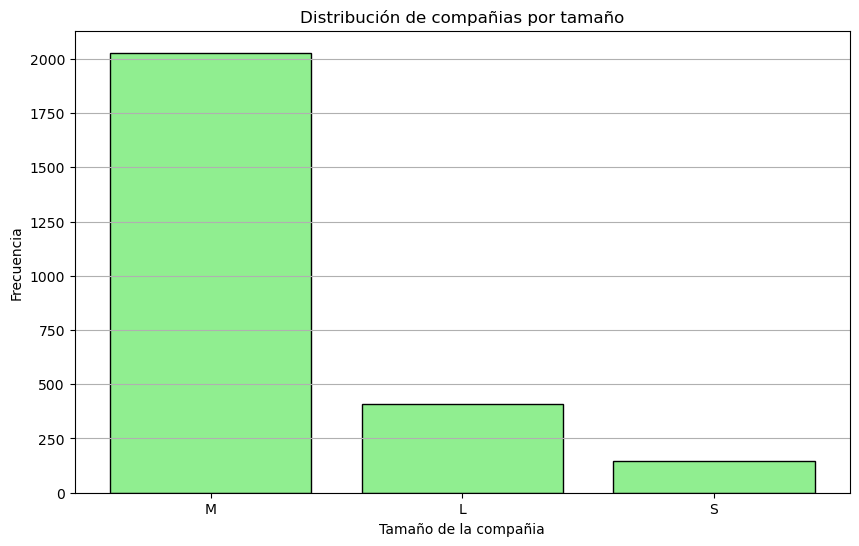

In [37]:
### Grafico univariado 2
plt.figure(figsize=(10, 6)) #tamanho del recuadro de 10x6 pulgadas
count_company_size = df['company_size'].value_counts()
plt.bar(count_company_size.index, count_company_size.values, color='lightgreen', edgecolor='black')# valor target con las configuraciones de la barra
plt.title('Distribución de compañias por tamaño')#titulo
plt.xlabel('Tamaño de la compañia')#label x
plt.ylabel('Frecuencia')#label y
plt.grid(axis='y')#visualizacion de las lineas de referencias, en este caso en el axis y
plt.show() #mostrar el grafico

## En este grafico se puede observar que en este dataset la mayor distribucion de compañias son medianas empresas con una frecuencia de mas de 2000, seguido por las grandes con un aproximado de 400 seguido por las pequeñas con un promedio de 150


C:\Users\ENRIF\AppData\Local\Temp\ipykernel_32304\2243523920.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_data, labels=grouped_data.index, patch_artist=True, boxprops=dict(facecolor='lightblue'))


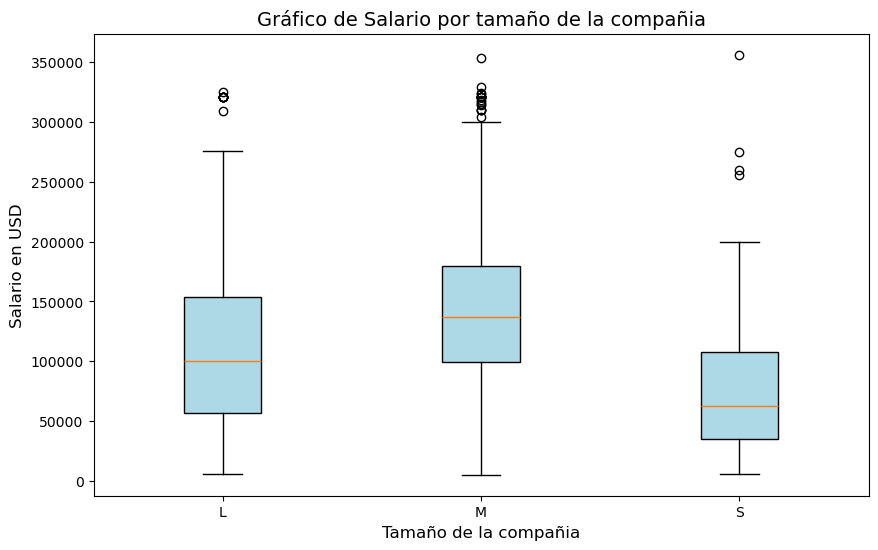

In [43]:
#Grafico multivariado 1
# Crear el gráfico de boxplot
plt.figure(figsize=(10, 6))
# Agrupar los salarios por nivel de experiencia
grouped_data = df.groupby('company_size')['salary_in_usd'].apply(list)

plt.boxplot(grouped_data, labels=grouped_data.index, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Configurar título y etiquetas
plt.title("Gráfico de Salario por tamaño de la compañia", fontsize=14)  # título del gráfico
plt.suptitle('')  # eliminar el título adicional que añade boxplot
plt.xlabel("Tamaño de la compañia", fontsize=12)  # label x
plt.ylabel("Salario en USD", fontsize=12)  # label y
plt.show()
### Explicacion: De acuerdo al grafico podemos asumir que las empresas de mediano tamaño ofrecen salarios mas altos que las demas. Sin embargo de acuerdo a la dispersion de los datos se puede ver que 
# las compañias grandes y pequeñas hay mayor variabilidad de salarios.

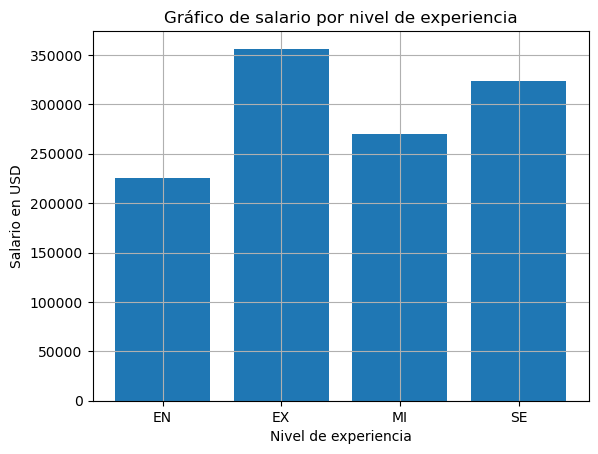

In [44]:
#Grafico univariado 2
x = df['experience_level']
target = df['salary_in_usd']


# Crear el gráfico de barras
plt.bar(x, target)## eje x e y del grafico
plt.title("Gráfico de salario por nivel de experiencia") ##titulo del grafico
plt.xlabel("Nivel de experiencia") ##label x
plt.ylabel("Salario en USD")### label y
plt.grid(True) #agregar una cuadricula para facilitar la lectura de los valores
plt.show()
### Explicacion: De acuerdo al garfico podemos asumir que el nivel de experiencia "EX" es el que cuenta con mayor cantidad de salario con mas de 350000 USD y el de menor salario seria "EN" con al rededor de 225000

In [46]:
# Obtener estadísticas descriptivas
descriptive_stats_salary_usd = df['salary_in_usd'].describe() # Informacion estadistica en este caso de la columna salary_in_usd ya que es el dato numerico mas relevante en este dataset

print(descriptive_stats_salary_usd)

## Observacion: Considerando la columna salary_in_usd se cuenta con2584 registros de salarios, con un promedio de 132,789.35 USD y una desviación estándar de 65,183.23 USD, lo que indica una significativa variabilidad. 
# El salario mínimo es de 5,132 USD y el máximo alcanza 356,340 USD, sugiriendo la presencia de valores atípicos. 
# La mediana es de 130,000 USD, lo que indica que la mitad de los salarios están por debajo de esta cifra 

count      2584.000000
mean     132789.349458
std       65183.229305
min        5132.000000
25%       84975.000000
50%      130000.000000
75%      175000.000000
max      356340.000000
Name: salary_in_usd, dtype: float64


In [68]:
###Se presenta error de index para experience level :(
df = df.reset_index(drop=False)  # Restablece el índice y convierte cualquier nivel en columnas
df.reset_index(drop=True, inplace=True)  # Reinicia el índice sin agregar niveles como columnas
# Si es un MultiIndex, lo aplanamos primero
if isinstance(df.index, pd.MultiIndex):
    df.index = df.index.get_level_values(0)  # Selecciona solo el primer nivel del índice


# Agrupar los datos por año de trabajo y nivel de experiencia, y calcular el salario promedio
salary_by_year_experience = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Graficar el salario promedio por nivel de experiencia a lo largo de los años
for exp_level in salary_by_year_experience['experience_level'].unique():
    data = salary_by_year_experience[salary_by_year_experience['experience_level'] == exp_level]
    plt.plot(data['work_year'], data['salary_in_usd'], marker='o', label=exp_level)

# Configurar título y etiquetas
plt.title("Evolución del Salario por Nivel de Experiencia a lo Largo de los Años", fontsize=14)
plt.xlabel("Año de Trabajo", fontsize=12)
plt.ylabel("Salario Promedio en USD", fontsize=12)

# Mostrar la leyenda
plt.legend(title="Nivel de Experiencia")

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

## No se pueden sacar resultados debido a que se me presento error de index ValueError: 'experience_level' is both an index level and a column label, which is ambiguous.

ValueError: cannot insert level_1, already exists